In [136]:
import matplotlib.pyplot as plt
import multiprocess as mp
import numpy as np
import sympy as sp

In [137]:
N = 10  # приемлемо N = 7

x, k = sp.symbols("x k", real=True)
C_s = sp.symbols(f"c:{N}")

In [138]:
a = 0
b = 1

left = lambda u: sp.diff(u, x, 2) - sp.diff(u, x) - 2 * u
right = lambda x: -3 * sp.exp(-x)

u_exact = lambda x: (x + 1) * np.exp(-x)

In [139]:
begin = u_exact(a)
end = u_exact(b)

In [140]:
phi_0 = begin + (end - begin) * x
phi_k = sp.sin(k * sp.pi * x)

In [141]:
dphi_0 = sp.diff(phi_0)
dphi_k = sp.diff(phi_k, x)

In [142]:
u = phi_0 + sum(C_s[i] * phi_k.subs(k, i) for i in range(1, N))
R = left(u) - right(x)

In [143]:
def calculate_equation(i):
    l = sp.integrate(phi_k.subs(k, i) * R, (x, a, b))
    return sp.Eq(l, 0)


pool = mp.Pool(processes=mp.cpu_count())

equations = pool.map(calculate_equation, range(1, N))

pool.close()
pool.join()

In [144]:
solution = sp.solve(equations, C_s)
solution_l = list(solution.values())

In [145]:
for i in range(1, N):
    u = u.subs(C_s[i], solution_l[i - 1])

In [146]:
u

-0.264241117657115*x + 0.0438221384543135*sin(pi*x) + 0.00761598041647151*sin(2*pi*x) + 0.00228840458518098*sin(3*pi*x) + 0.000992376586859193*sin(4*pi*x) + 0.000506850911486641*sin(5*pi*x) + 0.000295818315616675*sin(6*pi*x) + 0.000185280497269638*sin(7*pi*x) + 0.000124627033817411*sin(8*pi*x) + 8.59480415200561e-5*sin(9*pi*x) + 1.0

In [147]:
u = sp.lambdify(x, u, modules=["numpy"])

x = np.linspace(a, b, 100)

u = u(x)
u_exact = u_exact(x)

In [148]:
print(f"max: {np.max(np.abs(u - u_exact))}\navg: {np.mean(np.abs(u - u_exact))}")

max: 0.00027922616519726606
avg: 4.949072785237263e-05


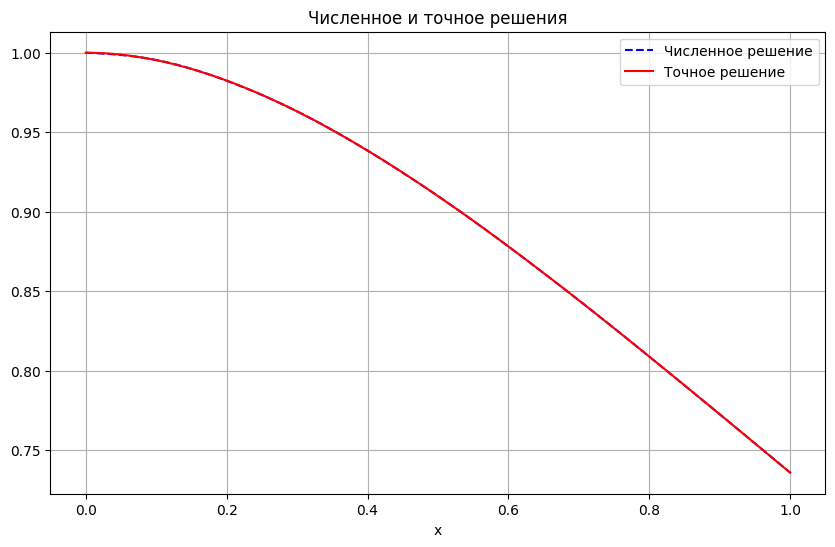

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(
    x,
    u,
    "b",
    label="Численное решение",
    linestyle="--",
)

plt.plot(
    x,
    u_exact,
    "r",
    label="Точное решение",
)

plt.xlabel("x")
plt.legend()
plt.title("Численное и точное решения")
plt.grid()
plt.show()